# Natural Language Processing (NLP)

NLP is a subfield of AI which enable computers to understand and process human language. The main task of NLP would be to program computers for analyzing and processing huge amount of natural language data

In [4]:
# install NLTK (Natural Language Tool Kit) for analysis text language in english.
# The Natural language toolkit (NLTK) is a collection of Python libraries designed especially 
# for identifying and tag parts of speech found in the text of natural language like English
!pip install nltk

!pip install pandas

Data from kaggle (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). The data contain csv files of true and fake news

**What is SpaCy**

spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research, and was designed from day one to be used in real products.

spaCy comes with pretrained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

In [5]:
# Install SpaCy

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached setuptools-67.7.2-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
                                              0.0/12.8 MB ? eta -:--:--
                                              0.1/12.8 MB 1.7 MB/s eta 0:00:08
                                              0.1/12.8 MB 2.0 MB/s eta 0:00:07
                                              0.1/12.8 MB 2.0 MB/s eta 0:00:07
                                              0.1/12.8 MB 2.0 MB/s eta 0:00:07
                                              0.1/12.8 MB 2.0 MB/s eta 0:00:07
                                             0.2/12.8 MB 787.7 kB/s eta 0:00:17
                                             0.2/12.8 MB 787.7 kB/s eta 0:00:17
                                             0.3/12.8 MB 746.4 kB/s eta 0:00:17
                                             0.3/12.8 MB 655.8 

In [8]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# import spacy
# nlp = spacy.load('en_core_web_sm')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import rcParams


In [9]:
df_true = pd.read_csv('Dataset\True.csv')
df_fake = pd.read_csv('Dataset\Fake.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
# Make class column for true and fake dataset
df_true['class'] = 1
df_fake['class'] = 0

# Merge the dataset to become a single dataset
df = pd.concat([df_true, df_fake])

df[(df['class']==1)].head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [11]:
df[(df['class']==0)].head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
# Make sample for 5000 dataset
df = df.sample(5000, random_state=42).reset_index(drop=True)
df.head(10)

,title,text,subject,date,class
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",1
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,"October 28, 2017",1
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,"September 6, 2017",1
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,"Feb 24, 2016",0
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",0


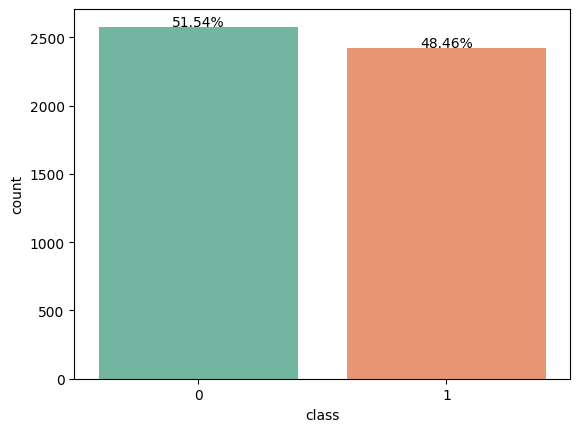

In [14]:
ax = sns.countplot(x=df['class'], data=df, palette="Set2")

# Make percentage
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 4, '{0:.2f}%'.format(height / total * 100), ha='center')

plt.show()

Observation = Data look balanced

## NLP Text Classification using PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

In [15]:
%pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

Note: you may need to restart the kernel to use updated packages.Collecting git+https://github.com/pycaret/pycaret.git@master
  Cloning https://github.com/pycaret/pycaret.git (to revision master) to c:\users\nuril\appdata\local\temp\pip-req-build-je76pbrl
  Resolved https://github.com/pycaret/pycaret.git to commit 9f1e37edcea2201861d189729dd9364a95d8f9de
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git 'C:\Users\nuril\AppData\Local\Temp\pip-req-build-je76pbrl'


In [16]:
from pycaret.nlp import *

fake_news_nlp = setup(data=df)

ModuleNotFoundError: No module named 'pycaret.nlp'